# This code assesses the outputs of VESIcal for the Iacono-Marziano model. 
First, we compare VESIcal saturation pressure results to the calibration data for this model. Then, we compare VESIcal outputs to a number of the compositoins in the calibratoin dataset for a range of H$_2$O and CO$_2$ contents with those calculated from the web calculator hosted at http://calcul-isto.cnrs-orleans.fr/

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

In [3]:
myfile_cal = v.ExcelFile('Iacono_MixedH2O-CO2Dataset.xlsx',  sheet_name=0, input_type='wtpercent')
myfile_web = v.ExcelFile('Iacono_MixedH2O-CO2Dataset.xlsx',  sheet_name=1, input_type='wtpercent') # This sheet is the pressures calculated using the web calculator

In [4]:
data_cal = myfile_cal.data
data_cal.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Label,,,,,,,,,,,,,,,,,,
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0583,0.0255,503,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0148,0.0567,1008,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.0148,0.0535,1008,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.7743,0.0895,1503,1199.85
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,12.25,2.92,0.14,0.11,0.7020,0.0901,1503,1199.85


In [5]:
data_web = myfile_web.data
data_web.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,Unnamed: 16,CO2,Press,Temp,App calculator P bar,App calculator 1 sigma,Check
Label,,,,,,,,,,,,,,,,,,,,,
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,...,0.14,0.11,0.7743,895.0,0.0895,1503,1199.85,1537.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,2.8200,1460.0,0.1460,2000,1299.85,3085.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,2.1200,1170.0,0.1170,2000,1299.85,2403.0,0.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,7.9700,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1.61,0.00,7.9700,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0


In [6]:
satPs_wtemps_Iacono_cal= myfile_cal.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3882: RuntimeWarning: overflow encountered in exp
  return h2o - np.exp(a*np.log(fugacity) + b*NBO_O + B + C*pressure/temperature)
/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3818: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


In [7]:
satPs_wtemps_Iacono_web= myfile_web.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')

In [8]:
satPs_wtemps_Iacono_web.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Unnamed: 16,CO2,Press,Temp,App calculator P bar,App calculator 1 sigma,Check,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
Pawley et al. 1992,49.46,1.58,14.32,0,0,11.24279,0,7.11,0,0,...,895.0,0.0895,1503,1199.85,1537.0,0.0,0,1529.549257,IaconoMarziano,
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1460.0,0.1460,2000,1299.85,3085.0,0.0,0,3121.751032,IaconoMarziano,
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,1170.0,0.1170,2000,1299.85,2403.0,0.0,0,2435.055844,IaconoMarziano,
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0,7394.114865,IaconoMarziano,
Botcharnikov et al 2006,57.44,1.06,17.53,0,0,7.20000,0,4.31,0,0,...,3210.0,0.3210,5000,1299.85,7606.0,1772.0,0,7394.114865,IaconoMarziano,


In [9]:
X=data_cal['Press'].values.reshape(-1, 1)
Y=satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal'].values.reshape(-1, 1)
#mask = ~np.isnan(X) & ~np.isnan(Y)
#X_noNan=X[mask].values.reshape(-1, 1)
#Y_noNan=Y[mask].values.reshape(-1, 1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)


Text(1000, 6000, 'R$^2$= 0.91948')

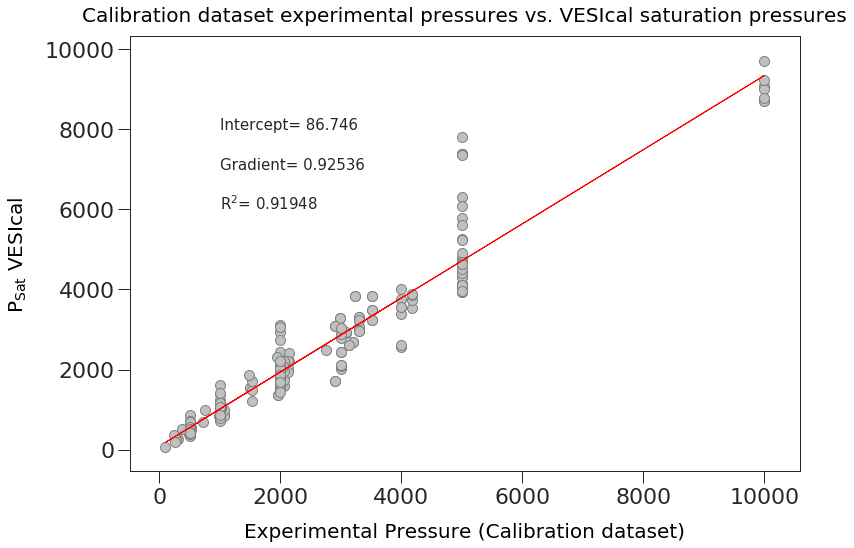

In [11]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Calibration dataset experimental pressures vs. VESIcal saturation pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental Pressure (Calibration dataset)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
plt.plot(X,Y_pred, color='red', linewidth=1)
plt.scatter(data_cal['Press'], satPs_wtemps_Iacono_cal['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
#plt.plot([0, 12000], [0, 12000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y, Y_pred), 5)) 
plt.text(1000, 8000, I, fontsize=15)
plt.text(1000, 7000, G, fontsize=15)
plt.text(1000, 6000, R, fontsize=15)

# Comparison of VESIcal saturation pressures with those from the web-app 

In [12]:
X_web=data_web['App calculator P bar']
Y_web=satPs_wtemps_Iacono_web['SaturationP_bars_VESIcal']
mask = ~np.isnan(X_web) & ~np.isnan(Y_web)
X_noNan=X_web[mask].values.reshape(-1, 1)
Y_noNan=Y_web[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred_web=lr.predict(X_noNan)

Text(1000, 6000, 'R$^2$= 0.99964')

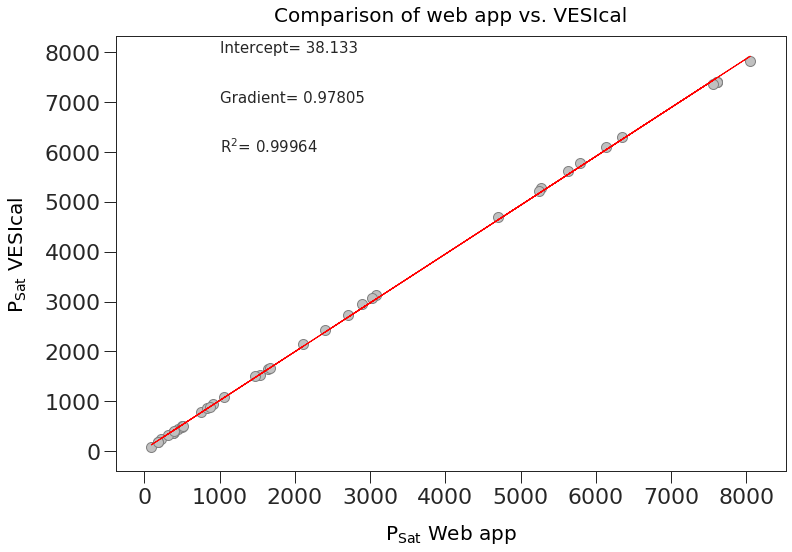

In [13]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of web app vs. VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ Web app', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_pred_web, color='red', linewidth=1)
plt.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o', label = 'Eguchi')
#plt.plot([0, 12000], [0, 12000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred_web), 5)) 
plt.text(1000, 8000, I, fontsize=15)
plt.text(1000, 7000, G, fontsize=15)
plt.text(1000, 6000, R, fontsize=15)

# Histogram showing the absolute offset between VESIcal and the Mac App in bars

(0, 12)

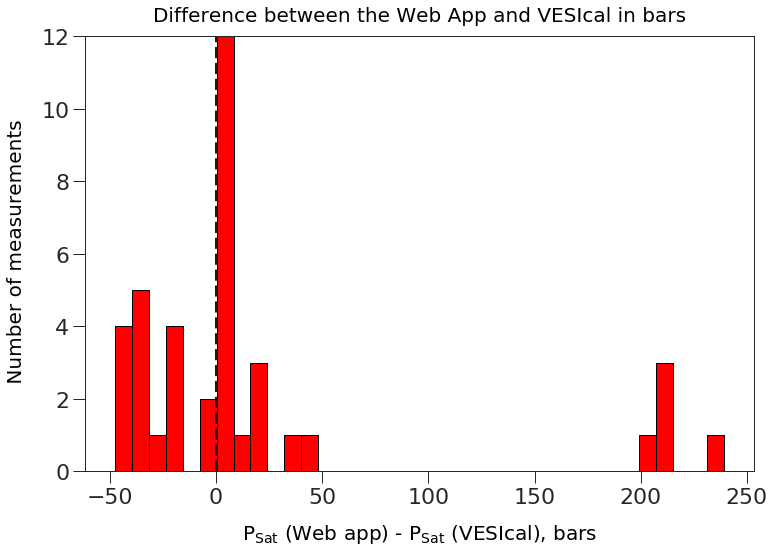

In [14]:
fig, ax1 = plt.subplots(figsize = (12,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Difference between the Web App and VESIcal in bars',
        fontdict= font, pad = 15)
plt.xlabel('P$_{Sat}$ (Web app) - P$_{Sat}$ (VESIcal), bars', fontdict=font, labelpad = 15)
plt.ylabel(' Number of measurements', fontdict=font, labelpad = 15)
plt.hist(X_noNan- Y_noNan, color='red', bins=int(180/5))
plt.plot([0, 0], [0, 12], color='k',  linestyle='dashed')
ax1.set_ylim([0, 12])

# What does offset correlate with

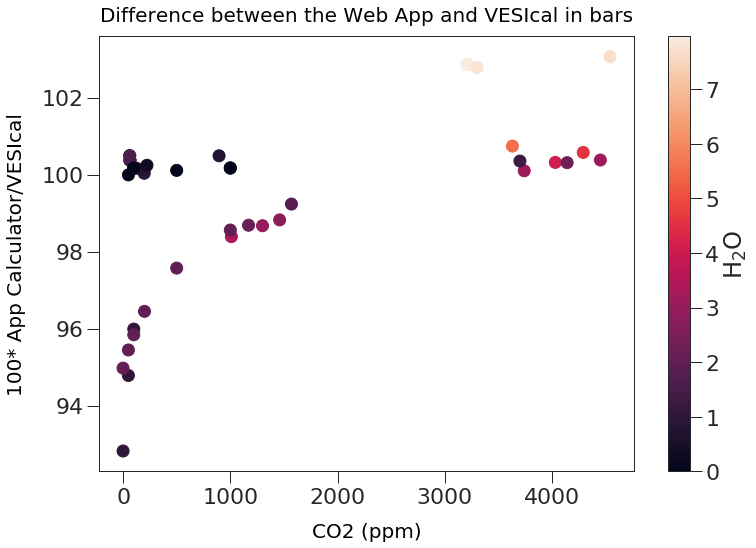

In [15]:
TestVariable=data_web['CO2']
TestVariable=TestVariable[mask]
TestVariable2=data_web['H2O']
TestVariable2=TestVariable2[mask]
logical=TestVariable>0
fig, ax1 = plt.subplots(figsize = (12,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Difference between the Web App and VESIcal in bars',
        fontdict= font, pad = 15)
plt.xlabel('CO2 (ppm)', fontdict=font, labelpad = 15)
plt.ylabel('100* App Calculator/VESIcal', fontdict=font, labelpad = 15)
plt.scatter(10**4*TestVariable, 100*X_noNan/Y_noNan, marker='o', c=TestVariable2)
#plt.scatter(10**4*TestVariable[logical], 100*X_noNan[logical]/Y_noNan[logical], color='blue')
cbar=plt.colorbar()
cbar.set_label('H$_2$O')

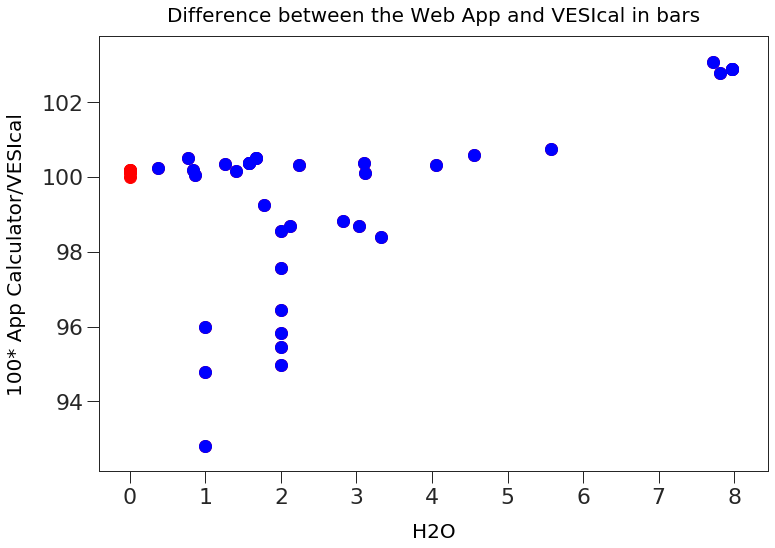

In [16]:
TestVariable2=data_web['H2O']
TestVariable2=TestVariable2[mask]
fig, ax1 = plt.subplots(figsize = (12,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Difference between the Web App and VESIcal in bars',
        fontdict= font, pad = 15)
plt.xlabel('H2O', fontdict=font, labelpad = 15)
plt.ylabel('100* App Calculator/VESIcal', fontdict=font, labelpad = 15)
plt.scatter(TestVariable2, 100*X_noNan/Y_noNan, color='red')
logical=TestVariable2>0
plt.scatter(TestVariable2[logical], 100*X_noNan[logical]/Y_noNan[logical], color='blue')

# Histogram of Percentage Error

(0, 22)

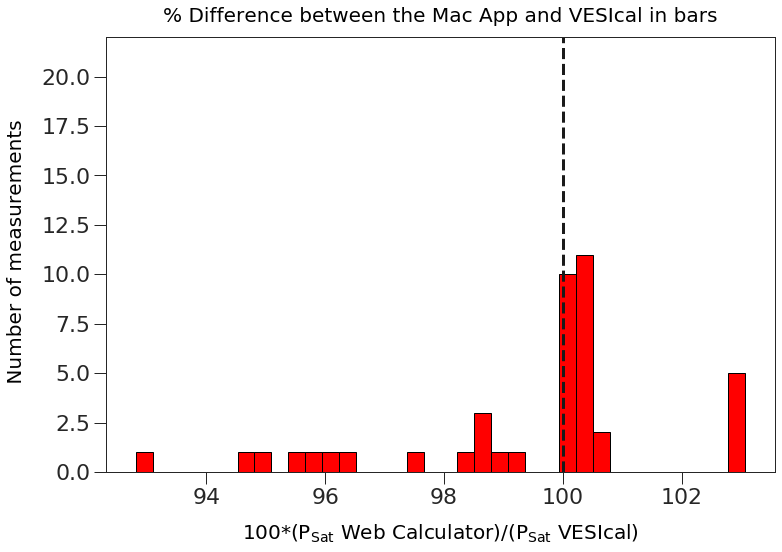

In [17]:
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
#ax1.set_xlim([35, 100]) # adjust x limits here if you want to focus on a specific part of compostional space
#ax1.set_ylim([0, 25]) # adjust y limits here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('% Difference between the Mac App and VESIcal in bars',
        fontdict= font, pad = 15)
plt.xlabel('100*(P$_{Sat}$ Web Calculator)/(P$_{Sat}$ VESIcal)', fontdict=font, labelpad = 15)
plt.ylabel(' Number of measurements', fontdict=font, labelpad = 15)
plt.hist(100.*X_noNan/Y_noNan, color='red', bins=int(180/5)) #
plt.plot([100, 100], [0, 22], color='k',  linestyle='dashed')
ax1.set_ylim([0, 22])

In [18]:
myfile_web.save_excelfile(filename='IaconoTesting2.xlsx', calculations=[satPs_wtemps_Iacono_web], sheet_name=['web'])

Saved IaconoTesting2.xlsx


# Dataset of 3 vectors of increasing CO2, one with no water, one with 0.5 wt%, the other with 1 T 1200x 

In [49]:
myfile_test = v.ExcelFile('Iacono_MixedH2O-CO2Dataset.xlsx',  sheet_name=2, input_type='wtpercent')
data_test = myfile_test.data
data_test.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm)
Label,,,,,,,,,,,,,,,,,,,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.000,0.00,1200,0
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.001,14.08,1200,10
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.003,42.15,1200,30
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.005,70.09,1200,50
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.010,139.00,1200,100


In [50]:
satPs_wtemps_Iacono_test= myfile_test.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
satPs_wtemps_Iacono_test.head()

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3818: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm),SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.000,0.00,1200,0,NaN,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.001,14.08,1200,10,14.082209,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.003,42.15,1200,30,42.147077,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.005,70.09,1200,50,70.080352,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.010,139.00,1200,100,139.346639,IaconoMarziano,


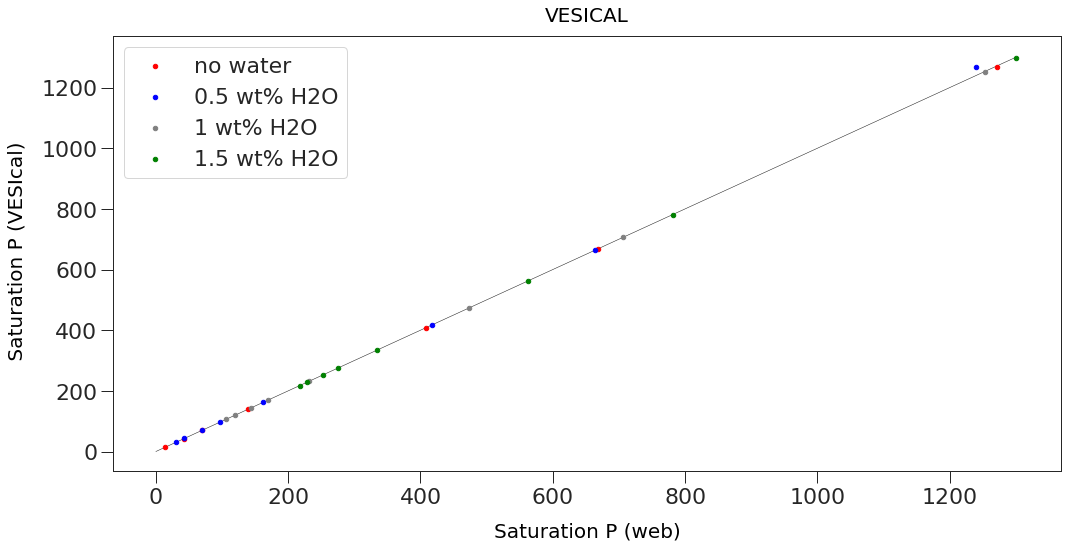

In [66]:
# X=Y comparison
fig, (ax1) = plt.subplots(1, 1, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('Saturation P (web)', fontdict=font, labelpad = 15)
ax1.set_ylabel(' Saturation P (VESIcal)', fontdict=font, labelpad = 15)
ax1.plot([0, 1300], [0, 1300], color='k', zorder=1, linewidth=0.5)
ax1.scatter(satPs_wtemps_Iacono_test['Press'].loc['NoH2O'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water', zorder=5)
ax1.scatter(satPs_wtemps_Iacono_test['Press'].loc['H2O_05'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O', zorder=6)
ax1.scatter(satPs_wtemps_Iacono_test['Press'].loc['H2O_1'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O', zorder=7)
ax1.scatter(satPs_wtemps_Iacono_test['Press'].loc['H2O_15'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O', zorder=8)

ax1.legend()

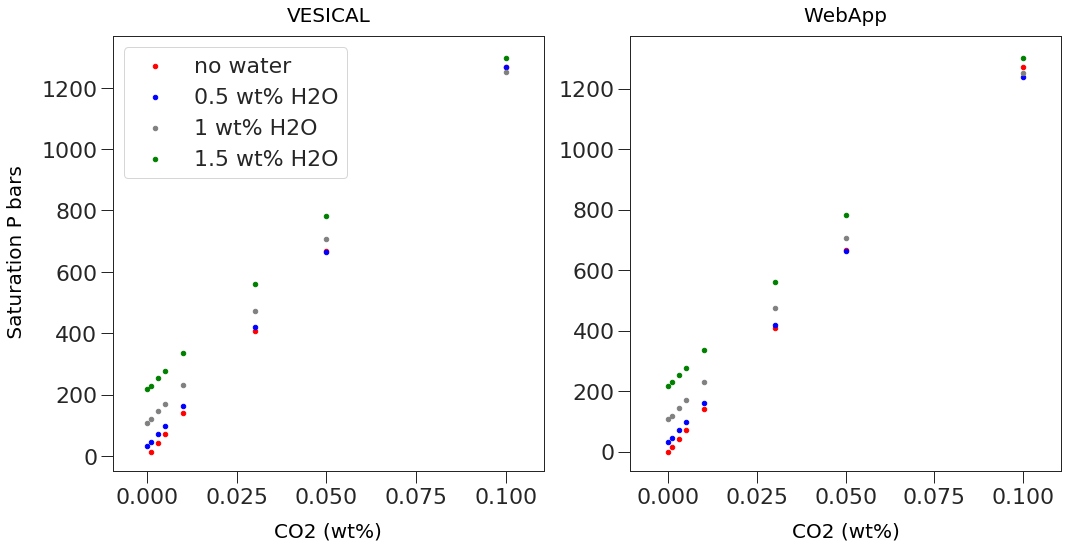

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.set_ylabel(' Saturation P bars', fontdict=font, labelpad = 15)
ax2.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['NoH2O'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_05'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_1'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_15'], satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O')

ax1.legend()

ax2.scatter(satPs_wtemps_Iacono_test['CO2'].loc['NoH2O'], satPs_wtemps_Iacono_test['Press'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water')
ax2.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_05'], satPs_wtemps_Iacono_test['Press'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O')
ax2.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_1'], satPs_wtemps_Iacono_test['Press'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O')
ax2.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_15'], satPs_wtemps_Iacono_test['Press'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O')

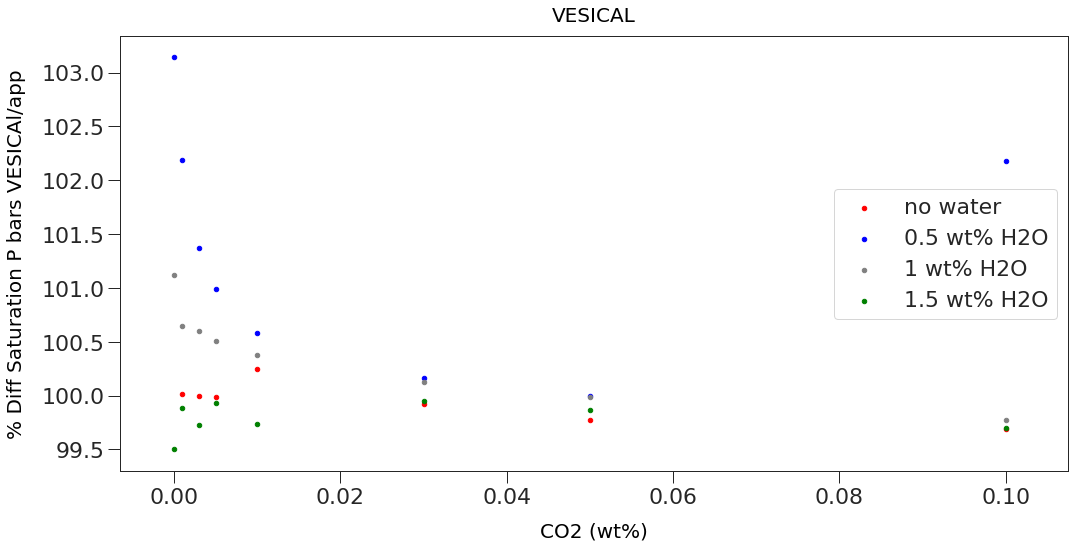

In [55]:
# Comparison of models
fig, (ax1) = plt.subplots(1, 1, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.set_ylabel('% Diff Saturation P bars VESICAl/app', fontdict=font, labelpad = 15)
ax2.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['NoH2O'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['NoH2O']/satPs_wtemps_Iacono_test['Press'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_05'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_05']/satPs_wtemps_Iacono_test['Press'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_1'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_1']/satPs_wtemps_Iacono_test['Press'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_15'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_15']/satPs_wtemps_Iacono_test['Press'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O')

ax1.legend()



# 1100C

In [59]:
myfile_test2 = v.ExcelFile('Iacono_MixedH2O-CO2Dataset.xlsx',  sheet_name=3, input_type='wtpercent')
data_test2 = myfile_test2.data
data_test2.head()


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm)
Label,,,,,,,,,,,,,,,,,,,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.000,0.00,1100,0
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.001,14.08,1100,10
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.003,42.14,1100,30
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.005,70.06,1100,50
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,12.25,2.92,2,0,0.0,0.010,139.00,1100,100


In [68]:
satPs_wtemps_Iacono_test2= myfile_test2.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
satPs_wtemps_Iacono_test2.head()


/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3818: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm),SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.000,0.00,1100,0,NaN,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.001,14.08,1100,10,14.081034,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.003,42.14,1100,30,42.136579,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.005,70.06,1100,50,70.051400,IaconoMarziano,
NoH2O,49.46,1.58,14.32,0,0,11.24,0,7.11,0,0,...,2,0,0.0,0.010,139.00,1100,100,139.232882,IaconoMarziano,


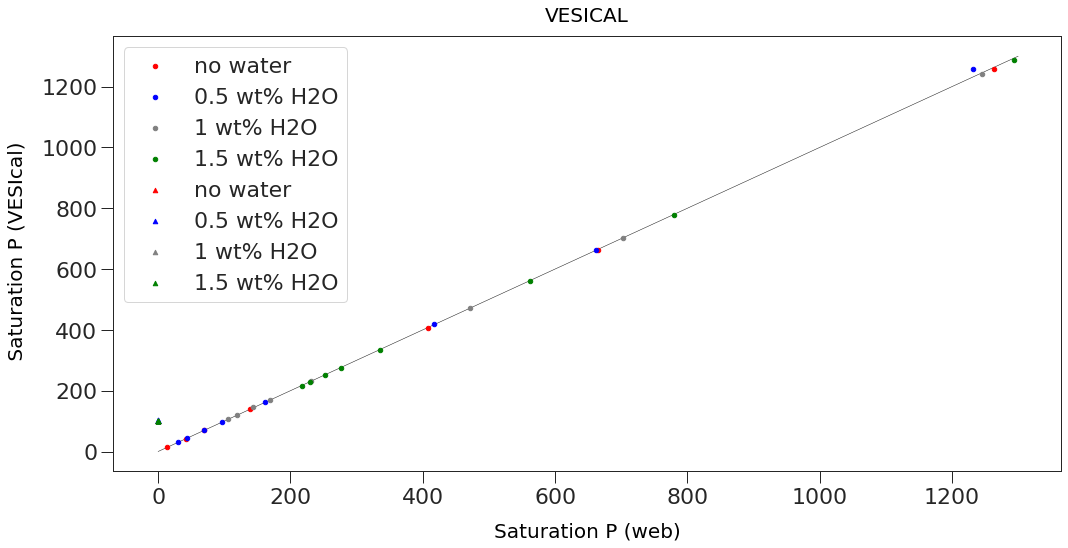

In [71]:
fig, (ax1) = plt.subplots(1, 1, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('Saturation P (web)', fontdict=font, labelpad = 15)
ax1.set_ylabel(' Saturation P (VESIcal)', fontdict=font, labelpad = 15)
ax1.plot([0, 1300], [0, 1300], color='k', zorder=1, linewidth=0.5)
ax1.scatter(satPs_wtemps_Iacono_test2['Press'].loc['NoH2O'], satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water', zorder=5)
ax1.scatter(satPs_wtemps_Iacono_test2['Press'].loc['H2O_05'], satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O', zorder=6)
ax1.scatter(satPs_wtemps_Iacono_test2['Press'].loc['H2O_1'], satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O', zorder=7)
ax1.scatter(satPs_wtemps_Iacono_test2['Press'].loc['H2O_15'], satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O', zorder=8)

ax1.legend()

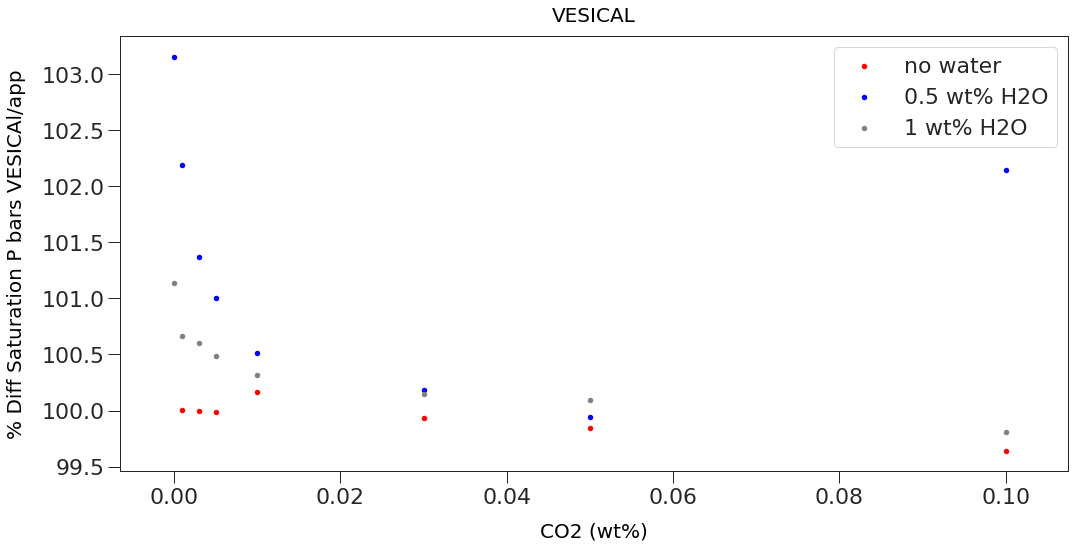

In [79]:
# Comparison of models
fig, (ax1) = plt.subplots(1, 1, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.set_ylabel('% Diff Saturation P bars VESICAl/app', fontdict=font, labelpad = 15)
ax2.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.scatter(satPs_wtemps_Iacono_test2['CO2'].loc['NoH2O'], 100.*satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['NoH2O']/satPs_wtemps_Iacono_test2['Press'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water')
ax1.scatter(satPs_wtemps_Iacono_test2['CO2'].loc['H2O_05'], 100.*satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_05']/satPs_wtemps_Iacono_test2['Press'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test2['CO2'].loc['H2O_1'], 100.*satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_1']/satPs_wtemps_Iacono_test2['Press'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O')
#ax1.scatter(satPs_wtemps_Iacono_test2['CO2'].loc['H2O_15'], 100.*satPs_wtemps_Iacono_test2['SaturationP_bars_VESIcal'].loc['H2O_15']/satPs_wtemps_Iacono_test2['Press'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O')
#ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['NoH2O'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['NoH2O']/satPs_wtemps_Iacono_test['Press'].loc['NoH2O'], marker='^',s=20,  facecolor='red', label='no water')
#ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_05'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_05']/satPs_wtemps_Iacono_test['Press'].loc['H2O_05'], marker='^', s=20, facecolor='blue', label='0.5 wt% H2O')
#ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_1'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_1']/satPs_wtemps_Iacono_test['Press'].loc['H2O_1'], marker='^', s=20, facecolor='gray', label='1 wt% H2O')
#ax1.scatter(satPs_wtemps_Iacono_test['CO2'].loc['H2O_15'], 100.*satPs_wtemps_Iacono_test['SaturationP_bars_VESIcal'].loc['H2O_15']/satPs_wtemps_Iacono_test['Press'].loc['H2O_15'], marker='^', s=20, facecolor='green', label='1.5 wt% H2O')


ax1.legend()


In [ ]:
# Diff composition

In [73]:
myfile_test3 = v.ExcelFile('Iacono_MixedH2O-CO2Dataset.xlsx',  sheet_name=4, input_type='wtpercent')
data_test3 = myfile_test3.data
data_test3.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,CO2(ppm),Unnamed: 20,Unnamed: 21,Unnamed: 22
Label,,,,,,,,,,,,,,,,,,,,,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,1.61,0,0.0,0.000,0.00,1100,0,0.0,0.0,0.0
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,1.61,0,0.0,0.001,18.94,1100,10,0.0,0.0,0.0
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,1.61,0,0.0,0.003,56.65,1100,30,0.0,0.0,0.0
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,1.61,0,0.0,0.005,94.10,1100,50,0.0,0.0,0.0
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,1.61,0,0.0,0.010,187.00,1100,100,0.0,0.0,0.0


In [74]:
satPs_wtemps_Iacono_test3= myfile_test3.calculate_saturation_pressure(temperature="Temp", model='IaconoMarziano')
satPs_wtemps_Iacono_test3.head()

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3818: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,CO2,Press,Temp,CO2(ppm),Unnamed: 20,Unnamed: 21,Unnamed: 22,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,0.000,0.00,1100,0,0.0,0.0,0.0,NaN,IaconoMarziano,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,0.001,18.94,1100,10,0.0,0.0,0.0,18.946965,IaconoMarziano,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,0.003,56.65,1100,30,0.0,0.0,0.0,56.651845,IaconoMarziano,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,0.005,94.10,1100,50,0.0,0.0,0.0,94.107752,IaconoMarziano,
NoH2O,57.44,1.06,17.53,0,0,7.2,0,4.31,0,0,...,0.010,187.00,1100,100,0.0,0.0,0.0,186.681949,IaconoMarziano,


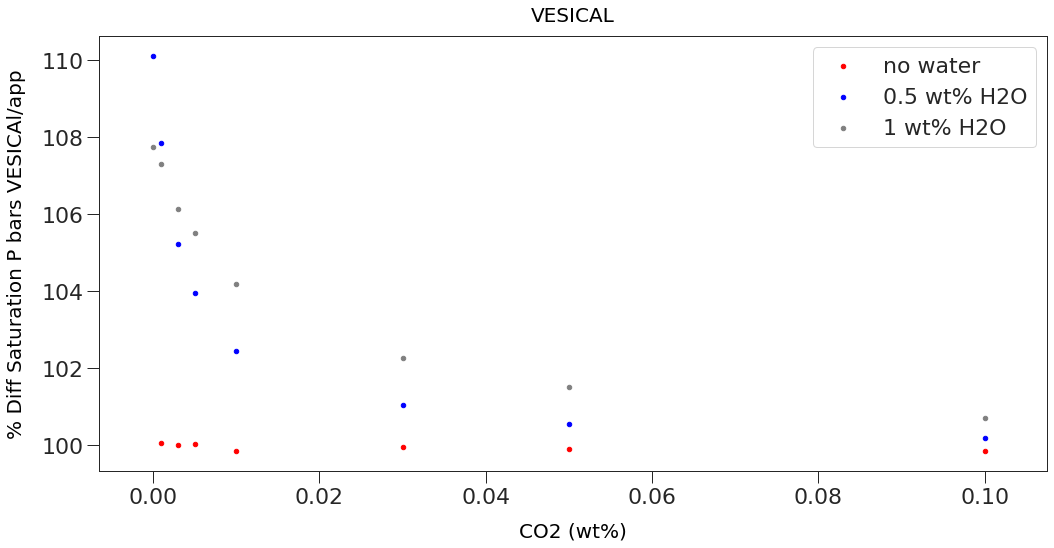

In [80]:
# Comparison of models
fig, (ax1) = plt.subplots(1, 1, figsize = (17,8)) 
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('VESICAL',
        fontdict= font, pad = 15)
ax2.set_title('WebApp',
        fontdict= font, pad = 15)
ax1.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.set_ylabel('% Diff Saturation P bars VESICAl/app', fontdict=font, labelpad = 15)
ax2.set_xlabel('CO2 (wt%)', fontdict=font, labelpad = 15)
ax1.scatter(satPs_wtemps_Iacono_test3['CO2'].loc['NoH2O'], 100.*satPs_wtemps_Iacono_test3['SaturationP_bars_VESIcal'].loc['NoH2O']/satPs_wtemps_Iacono_test3['Press'].loc['NoH2O'], marker='o',s=20,  facecolor='red', label='no water')
ax1.scatter(satPs_wtemps_Iacono_test3['CO2'].loc['H2O_05'], 100.*satPs_wtemps_Iacono_test3['SaturationP_bars_VESIcal'].loc['H2O_05']/satPs_wtemps_Iacono_test3['Press'].loc['H2O_05'], marker='o', s=20, facecolor='blue', label='0.5 wt% H2O')
ax1.scatter(satPs_wtemps_Iacono_test3['CO2'].loc['H2O_1'], 100.*satPs_wtemps_Iacono_test3['SaturationP_bars_VESIcal'].loc['H2O_1']/satPs_wtemps_Iacono_test3['Press'].loc['H2O_1'], marker='o', s=20, facecolor='gray', label='1 wt% H2O')
#ax1.scatter(satPs_wtemps_Iacono_test3['CO2'].loc['H2O_15'], 100.*satPs_wtemps_Iacono_test3['SaturationP_bars_VESIcal'].loc['H2O_15']/satPs_wtemps_Iacono_test['Press'].loc['H2O_15'], marker='o', s=20, facecolor='green', label='1.5 wt% H2O')

ax1.legend()
